In [1]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np

# Use 30 actively traded stocks in financials sector


In [2]:
import yfinance as yf
import pandas as pd

# List of technology stock tickers
stocks = [
    "JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "PGR", "BLK", "SPGI",
    "TFC", "COF", "PNC", "USB", "SCHW", "MET", "AIG", "PRU", "CB", "AON",
    "MMC", "ICE", "CME", "AFL", "TRV", "ALL", "BK", "MCO", "STT", "CFG"
]

# List to store DataFrames for each stock
stock_dataframes = []

# Download adjusted close price data for each stock and store in DataFrame
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')

    # Select only the "Adj Close" column and rename it with the stock ticker
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})

    # Append DataFrame to list
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)
print(stock_prices.head())

if stock_prices.isnull().any().any():
    print("NaN values found in the dataset")
else:
    print("No NaN values found in the dataset")


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

                  JPM        BAC        WFC          C          GS         MS  \
Date                                                                            
2015-01-02  48.268318  14.798186  41.823166  42.305519  162.280441  30.020710   
2015-01-05  46.769833  14.368294  40.676281  40.972267  157.213623  29.082314   
2015-01-06  45.557129  13.938403  39.827576  39.529850  154.033295  28.244741   
2015-01-07  45.626659  14.004539  40.064606  39.896309  156.328796  28.648024   
2015-01-08  46.646236  14.293886  40.951530  40.496658  158.824661  29.074556   

                  AXP        PGR         BLK       SPGI  ...        MMC  \
Date                                                     ...              
2015-01-02  80.772026  21.067553  281.638153  80.635834  ...  48.202747   
2015-01-05  78.635933  20.833811  274.350983  79.207909  ...  47.864296   
2015-01-06  76.960068  20.576698  270.087708  78.061958  ...  47.221260   
2015-01-07  78.640900  21.005222  275.803741  79.098778  

# C=1 no short

Step 1: Calculate the Covariance Matrix using data of past three years 2021-01-05 to 2024-01-31

In [3]:
# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date] #2021-01-04 to 2024-01-31

# Calculate returns
returns = filtered_data.pct_change().dropna()   #773 rows

# Compute covariance matrix
cov_matrix = returns.cov()
print(cov_matrix.head())

          JPM       BAC       WFC         C        GS        MS       AXP  \
JPM  0.000231  0.000229  0.000229  0.000212  0.000190  0.000198  0.000184   
BAC  0.000229  0.000318  0.000292  0.000261  0.000228  0.000245  0.000225   
WFC  0.000229  0.000292  0.000399  0.000269  0.000237  0.000242  0.000238   
C    0.000212  0.000261  0.000269  0.000320  0.000219  0.000235  0.000207   
GS   0.000190  0.000228  0.000237  0.000219  0.000272  0.000240  0.000190   

          PGR       BLK      SPGI  ...       MMC       ICE       CME  \
JPM  0.000089  0.000171  0.000092  ...  0.000092  0.000081  0.000078   
BAC  0.000078  0.000199  0.000109  ...  0.000090  0.000091  0.000084   
WFC  0.000098  0.000191  0.000106  ...  0.000091  0.000082  0.000087   
C    0.000073  0.000185  0.000102  ...  0.000085  0.000085  0.000072   
GS   0.000069  0.000187  0.000111  ...  0.000092  0.000100  0.000075   

          AFL       TRV       ALL        BK       MCO       STT       CFG  
JPM  0.000132  0.000110  0.0

Step 2: Retrieve the recent three month realized stocks returns

In [4]:
#As if we hold the portfolio for 3 months Feb Mar Apr
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 4, 30)

# Calculate returns for February to April 2024
specific_months_returns = stock_prices.loc[start_date:end_date].pct_change().dropna() # 61rows and 30 columns
print(specific_months_returns.head())

                 JPM       BAC       WFC         C        GS        MS  \
Date                                                                     
2024-02-02  0.005756 -0.002384  0.008824  0.000180  0.010447  0.005183   
2024-02-05 -0.001316 -0.014341 -0.009357 -0.018725 -0.012479 -0.015813   
2024-02-06  0.003438  0.001516 -0.008419 -0.002752  0.005143  0.002445   
2024-02-07  0.001885  0.004237  0.003935  0.003496  0.004338 -0.001161   
2024-02-08 -0.003591 -0.001808 -0.002682 -0.004584 -0.004190 -0.004070   

                 AXP       PGR       BLK      SPGI  ...       MMC       ICE  \
Date                                                ...                       
2024-02-02  0.015697  0.011079  0.003911 -0.006933  ... -0.001961 -0.007940   
2024-02-05 -0.002277  0.008246 -0.006129 -0.005528  ... -0.005792 -0.015151   
2024-02-06 -0.001408 -0.010484  0.006142  0.003876  ...  0.011756 -0.003314   
2024-02-07  0.016679  0.010540  0.008528  0.014185  ...  0.006324  0.013853   
2024-02

Step 3: Set up the Markowitz Portfolio Optimization Problem

In [39]:
# Assuming 'returns' is a pandas DataFrame of asset returns
num_assets = 30
expected_returns = returns.mean().values

# Optimization variables
weights = cp.Variable(num_assets)

# Portfolio return
portfolio_return = weights.T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights is 1
    weights >= 0,          # Weights are non-negative
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = weights.value
optimized_return = portfolio_return.value
optimized_variance = portfolio_variance.value

print("Optimized Weights:", optimized_weights)

Optimized Weights: [6.77485506e-10 1.15370080e-10 1.33610853e-10 2.31672409e-10
 1.84698907e-02 1.86040554e-10 1.24508592e-10 1.23340232e-01
 7.21848441e-11 5.05247427e-02 4.65707483e-11 7.11658155e-11
 7.20245592e-11 6.28531450e-11 5.58495965e-11 1.75982968e-10
 5.87758482e-11 7.93481268e-11 5.73002094e-10 2.68328393e-09
 2.13033877e-01 7.75619478e-02 1.92098566e-01 1.78214111e-01
 1.46756627e-01 5.02388499e-10 1.36934313e-10 1.95635046e-10
 3.61413550e-11 4.07931257e-11]


In [40]:
growth_rate = 1+specific_months_returns
daily_returns = growth_rate.dot(optimized_weights)
print(daily_returns.shape)
quarter_return = np.prod(daily_returns)
quarter_return


(61,)


1.0494935199930715

In [41]:
print("A Quarter Realized Return is:", quarter_return-1)
print("SD of Daily Portfolio Returns",np.std(daily_returns, ddof=1))

A Quarter Realized Return is: 0.0494935199930715
SD of Daily Portfolio Returns 0.0061259594156693525


In [42]:
# Given data
quarter_return
daily_sd = np.std(daily_returns, ddof=1)

# Annualize the returns and standard deviation
annualized_return = quarter_return ** 4 -1
annualized_sd = daily_sd * np.sqrt(252)

# Assume a risk-free rate of 5%
risk_free_rate = 0.05

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

print("Annualized Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_sd)
print("Sharpe Ratio:", sharpe_ratio)
print("Max weight is", np.max(optimized_weights))


Annualized Return: 0.21316269067531857
Annualized Standard Deviation: 0.09724659093321399
Sharpe Ratio: 1.677824272394019
Max weight is 0.2130338765873153


# C = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, float('inf')])

In [38]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn = []
Sharpe =[]
SD = []
Max = []

for i in c_values:
  num_assets = 30
  expected_returns = returns.mean().values

  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 1.5
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]

  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value

  # Given data
  #growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns) # this compares to
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

  Realizedreturn.append(annualized_return*100)
  Sharpe.append(sharpe_ratio)
  SD.append(daily_sd*100)
  Max.append(np.max(optimized_weights))






[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [43]:
print(Realizedreturn)
print(len(Realizedreturn))

[21.31612150123916, 35.54835896407484, 41.500266959592125, 43.6851825390979, 44.89398307969983, 45.10726382269499, 45.10740989180621, 45.10764179251645, 45.10726754797434, 45.107814531124376, 45.10753349594574, 45.1075357214394, 45.10744850802999, 45.107444395902974]
14


In [44]:
print(SD)
print(len(SD))

[0.6125967690442119, 0.7132942183267774, 0.7520675518545907, 0.761591985919403, 0.7740721551372242, 0.7794811410985802, 0.7794803600938449, 0.7794831524547539, 0.7794808075611128, 0.7794859667990561, 0.7794876196540356, 0.7794809338533524, 0.7794803250384992, 0.7794801808046737]
14


# Factor - model covariance

In [45]:
from google.colab import files
uploaded = files.upload()

Saving 5_Factors.CSV to 5_Factors (1).CSV


In [46]:

# Load the data, skipping the first two rows to ignore the introductory text
df = pd.read_csv('5_Factors.CSV', skiprows=2)

# Display the first few rows and the column names to confirm the structure
print(df.head())
print(df.columns)





   Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
0    19630701   -0.67  0.02 -0.35  0.03  0.13  0.012
1    19630702    0.79 -0.28  0.28 -0.08 -0.21  0.012
2    19630703    0.63 -0.18 -0.10  0.13 -0.25  0.012
3    19630705    0.40  0.09 -0.28  0.07 -0.30  0.012
4    19630708   -0.63  0.07 -0.20 -0.27  0.06  0.012
Index(['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')


In [48]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.set_index('Unnamed: 0', inplace=True)
# Filter the data to match the date
df = df[(df.index >= pd.Timestamp('2021-01-01')) & (df.index <= pd.Timestamp('2024-01-31'))]
print(df) # 774 rows

            Mkt-RF   SMB   HML   RMW   CMA     RF
Unnamed: 0                                       
2021-01-04   -1.41  0.16  0.58 -0.64  0.10  0.000
2021-01-05    0.86  1.32  0.49  0.36  0.55  0.000
2021-01-06    0.79  3.15  3.94  0.06  0.53  0.000
2021-01-07    1.76  0.02 -0.83 -1.50 -0.20  0.000
2021-01-08    0.51 -1.01 -1.37 -0.43 -0.37  0.000
...            ...   ...   ...   ...   ...    ...
2024-01-25    0.46  0.20  0.56 -0.19  0.55  0.022
2024-01-26   -0.02  0.35 -0.27  0.22 -0.02  0.022
2024-01-29    0.86  0.89 -0.59 -1.13 -0.31  0.022
2024-01-30   -0.13 -0.96  0.84  1.00  0.13  0.022
2024-01-31   -1.74 -0.89 -0.30 -0.21  0.37  0.022

[774 rows x 6 columns]


In [49]:
# Merge the stock prices with the factors on date
returns.index = pd.to_datetime(returns.index)
df.index = pd.to_datetime(df.index)
data = pd.concat([returns, df], axis=1).dropna()  # 773 Rows  2021-01-05 - 2024-01-30
data

,JPM,BAC,WFC,C,GS,MS,AXP,PGR,BLK,SPGI,...,BK,MCO,STT,CFG,Mkt-RF,SMB,HML,RMW,CMA,RF
2021-01-05,0.005441,0.007659,0.027946,0.025940,0.022377,0.016976,0.005337,-0.001853,0.005290,-0.014404,...,0.011273,-0.026096,0.005951,0.021678,0.86,1.32,0.49,0.36,0.55,0.000
2021-01-06,0.046956,0.062459,0.070750,0.057536,0.053962,0.060296,0.036993,0.018979,0.028520,0.001248,...,0.067600,-0.010655,0.068107,0.069441,0.79,3.15,3.94,0.06,0.53,0.000
2021-01-07,0.032839,0.022084,0.022637,0.011801,0.021362,0.017101,-0.007910,0.005839,0.021035,0.000639,...,0.005999,0.000107,0.001288,0.035042,1.76,0.02,-0.83,-1.50,-0.20,0.000
2021-01-08,0.001104,-0.010043,-0.007179,-0.009845,-0.005383,0.004137,0.000986,-0.002533,0.008036,-0.006746,...,-0.010601,-0.004158,-0.007719,-0.015186,0.51,-1.01,-1.37,-0.43,-0.37,0.000
2021-01-11,0.014924,0.016600,0.001506,0.016368,0.012927,0.010764,-0.005912,0.006243,0.013524,-0.023405,...,0.016965,-0.013775,0.013095,0.006825,-0.51,0.54,1.26,-0.17,0.45,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.014311,0.012432,0.007880,0.008825,0.008698,0.005139,0.012109,-0.001962,0.005994,0.007715,...,0.007831,0.006822,0.011376,-0.002375,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,-0.003816,0.001198,0.008821,-0.001117,-0.012830,-0.003295,0.071037,0.007921,-0.003998,-0.006098,...,-0.000181,-0.008431,0.005758,-0.000298,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,0.002612,0.005384,0.000596,0.008198,0.007332,-0.001254,-0.002830,-0.009252,0.001778,0.007188,...,0.010302,0.005086,-0.003595,0.019946,0.86,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,0.020494,0.035109,0.016683,0.055073,0.016581,0.009796,0.016380,0.010970,-0.008837,0.010560,...,0.002504,0.013392,0.000134,0.013889,-0.13,-0.96,0.84,1.00,0.13,0.022


In [50]:
factors = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Convert these to numeric if not already
factors = factors.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that might have been introduced
factors = factors.dropna()

# Calculate the covariance matrix
factor_covariance_matrix = factors.cov()

# Display the covariance matrix
print(factor_covariance_matrix)

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.337839  0.200752 -0.439214 -0.295037 -0.338805
SMB     0.200752  0.541250  0.104861 -0.215985 -0.001800
HML    -0.439214  0.104861  1.109992  0.323820  0.494091
RMW    -0.295037 -0.215985  0.323820  0.510852  0.178210
CMA    -0.338805 -0.001800  0.494091  0.178210  0.397571


Step 2: Run the linear regression

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
from datetime import datetime

# List of technology stock tickers
stocks = [
    "JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "PGR", "BLK", "SPGI",
    "TFC", "COF", "PNC", "USB", "SCHW", "MET", "AIG", "PRU", "CB", "AON",
    "MMC", "ICE", "CME", "AFL", "TRV", "ALL", "BK", "MCO", "STT", "CFG"
]

# Download adjusted close price data for each stock and store in DataFrame
stock_dataframes = []
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)

# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date]

# Calculate returns
returns = filtered_data.pct_change().dropna()

# Run linear regression
factor_levels = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].dropna()

# Dictionary to hold regression results
regressions = {}
for stock in stocks:
    y = returns[stock].dropna()
    X = factor_levels.loc[y.index]  # Align the index of factors with the stock returns
    X = sm.add_constant(X)  # Add constant term to the model
    model = sm.OLS(y, X)
    results = model.fit()
    regressions[stock] = {
        'params': results.params,
        'resid': results.resid,
        'predict': results.predict()
    }

# Extract beta coefficients for each stock into a DataFrame
betas_dict = {}
for stock, values in regressions.items():
    params = values['params']
    if isinstance(params, pd.Series):
        betas_dict[stock] = params.values
    else:
        betas_dict[stock] = params.iloc[:, 0].values

betas = pd.DataFrame(betas_dict, index=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']).T
print("Beta Coefficients:")
print(betas)

# Calculate the covariance matrix of factor levels (excluding the intercept)
factor_cov_matrix = factor_levels.cov()

# Calculate idiosyncratic variance (variance of residuals)
idiosyncratic_var = {stock: regressions[stock]['resid'].var() for stock in stocks}

# Asset covariance matrix calculation using factor model
# Initialize an empty DataFrame
asset_cov_matrix = pd.DataFrame(index=stocks, columns=stocks)

# Populate the asset covariance matrix
for stock_i in stocks:
    for stock_j in stocks:
        beta_i = regressions[stock_i]['params'].drop('const').values  # Exclude intercept
        beta_j = regressions[stock_j]['params'].drop('const').values  # Exclude intercept
        if stock_i == stock_j:
            # Diagonal elements: Variance from factors + idiosyncratic variance
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_i)) + idiosyncratic_var[stock_i]
        else:
            # Off-diagonal elements: Covariance from factors only
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_j))

print("Asset Covariance Matrix:")
print(asset_cov_matrix)


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Beta Coefficients:
         const    Mkt-RF       SMB       HML       RMW       CMA
JPM   0.000085  0.009982 -0.001895  0.009422 -0.001675 -0.004603
BAC  -0.000209  0.011246 -0.000667  0.013975 -0.003748 -0.008312
WFC   0.000256  0.011980 -0.000260  0.013690 -0.002436 -0.007138
C    -0.000343  0.010929  0.000312  0.011550 -0.003851 -0.005097
GS    0.000189  0.010512  0.001174  0.009167 -0.001499 -0.005384
MS    0.000112  0.011262  0.000303  0.009695 -0.003014 -0.006219
AXP   0.000380  0.011956  0.000138  0.008003 -0.001679 -0.004440
PGR   0.000574  0.006440 -0.003770  0.003664  0.000333  0.000823
BLK  -0.000137  0.012734 -0.000860  0.003499  0.000291 -0.002759
SPGI  0.000234  0.009299 -0.001478 -0.000452  0.001942 -0.002313
TFC  -0.000598  0.012242  0.003989  0.015778 -0.000810 -0.012401
COF   0.000109  0.013303  0.002900  0.012468 -0.000995 -0.010274
PNC  -0.000292  0.011341  0.001422  0.013079 -0.002008 -0.008398
USB  -0.000476  0.011378  0.001764  0.014927 -0.001751 -0.008761
SCHW -

In [52]:
import pandas as pd

# Assuming regressions dictionary contains regression results for each ETF
# Extract beta coefficients for each ETF into a DataFrame
betas = pd.DataFrame({stock: values['params'] for stock, values in regressions.items()})

# Optionally, if you're using Jupyter Notebook, simply write 'betas' without print() for a nicer format:
betas


,JPM,BAC,WFC,C,GS,MS,AXP,PGR,BLK,SPGI,...,MMC,ICE,CME,AFL,TRV,ALL,BK,MCO,STT,CFG
const,0.000085,-0.000209,0.000256,-0.000343,0.000189,0.000112,0.000380,0.000574,-0.000137,0.000234,...,0.000413,0.000062,0.000143,0.000461,0.000140,0.000131,0.000074,0.000229,-0.000318,-0.000428
Mkt-RF,0.009982,0.011246,0.011980,0.010929,0.010512,0.011262,0.011956,0.006440,0.012734,0.009299,...,0.008482,0.007726,0.005832,0.008978,0.007600,0.007977,0.010371,0.010402,0.013382,0.013297
SMB,-0.001895,-0.000667,-0.000260,0.000312,0.001174,0.000303,0.000138,-0.003770,-0.000860,-0.001478,...,-0.002961,-0.002507,-0.003487,-0.001340,-0.002308,-0.001158,-0.000259,-0.001658,0.000148,0.004586
HML,0.009422,0.013975,0.013690,0.011550,0.009167,0.009695,0.008003,0.003664,0.003499,-0.000452,...,-0.000074,0.000300,0.002560,0.007055,0.006735,0.006585,0.011306,-0.000718,0.011944,0.016991
RMW,-0.001675,-0.003748,-0.002436,-0.003851,-0.001499,-0.003014,-0.001679,0.000333,0.000291,0.001942,...,0.002407,-0.000839,-0.001350,-0.000233,0.000906,0.000683,-0.001802,0.001827,-0.001433,-0.001264
CMA,-0.004603,-0.008312,-0.007138,-0.005097,-0.005384,-0.006219,-0.004440,0.000823,-0.002759,-0.002313,...,0.001249,-0.000299,0.000491,-0.000213,0.000600,-0.000031,-0.007486,-0.002445,-0.007630,-0.011892


Step 3: Compute the Covariance matrix using
$$\Sigma_{R} = \beta^{T} \Sigma_{F} \beta + \Sigma_{\sigma}$$

In [53]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn_f = []
Sharpe_f =[]
SD_f = []
Max_f = []


for i in c_values:
  expected_returns = returns.mean().values

  # Optimization variables
  num_assets = 30
  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, asset_cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 2
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]
  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value
  optimized_return = portfolio_return.value
  optimized_variance = portfolio_variance.value

  #print("Optimized Weights:", optimized_weights)
  growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns)
  # Given data
  quarter_return
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd
  weight_diff = (weights_pos - weights_neg).value
  num_positive = np.sum(weight_diff > 0)
  num_negative = np.sum(weight_diff < 0)


  Realizedreturn_f.append(annualized_return*100)
  Sharpe_f.append(sharpe_ratio)
  SD_f.append(daily_sd*100)
  Max_f.append(np.max(weight_diff))
  #print("Annualized Return:", annualized_return)
  #print("Annualized Standard Deviation:", annualized_sd)
  #print("Sharpe Ratio:", sharpe_ratio)


[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [54]:
print(Sharpe_f)
print(len(Sharpe_f))

[3.109003868277772, 2.7855260759402505, 2.6974914701014594, 2.6616719655160708, 2.4846545893160124, 2.3263142377921637, 2.3262964653201252, 2.3262832691065305, 2.3262778184190234, 2.3262919211176825, 2.326286514467138, 2.326293135609516, 2.326313405880208, 2.326284160166581]
14


In [55]:
print(Realizedreturn_f)

[41.41011185450447, 45.21873710186004, 51.1757707329006, 56.45867152519142, 56.27494176284511, 53.52641834171274, 53.52606247856393, 53.525862900603414, 53.525780852439794, 53.526007547474855, 53.52589458810431, 53.526028600462716, 53.52634214684995, 53.52590409632039]


In [56]:
print(SD_f)

[0.737735156894379, 0.9095381721667557, 1.0783352511212472, 1.2178779552074286, 1.2999866208973814, 1.3140430355156938, 1.3140434380963062, 1.3140454877899812, 1.3140463449115258, 1.3140445174733277, 1.314044512662232, 1.3140444015452213, 1.314041442154682, 1.3140461000078814]


# Return Comparison Graph

In [57]:
print(len(Realizedreturn))
print(len(Realizedreturn))

14
14


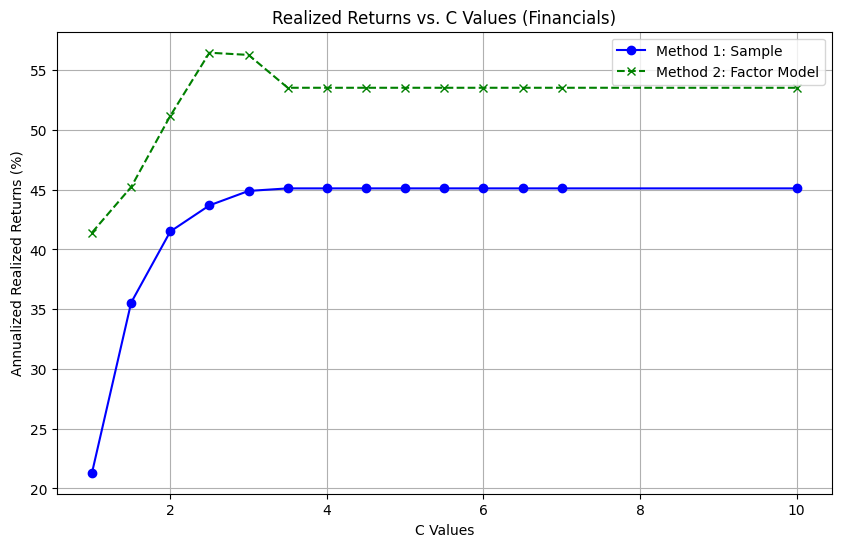

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Realizedreturn, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Realizedreturn_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('Realized Returns vs. C Values (Financials)')
plt.xlabel('C Values')
plt.ylabel('Annualized Realized Returns (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


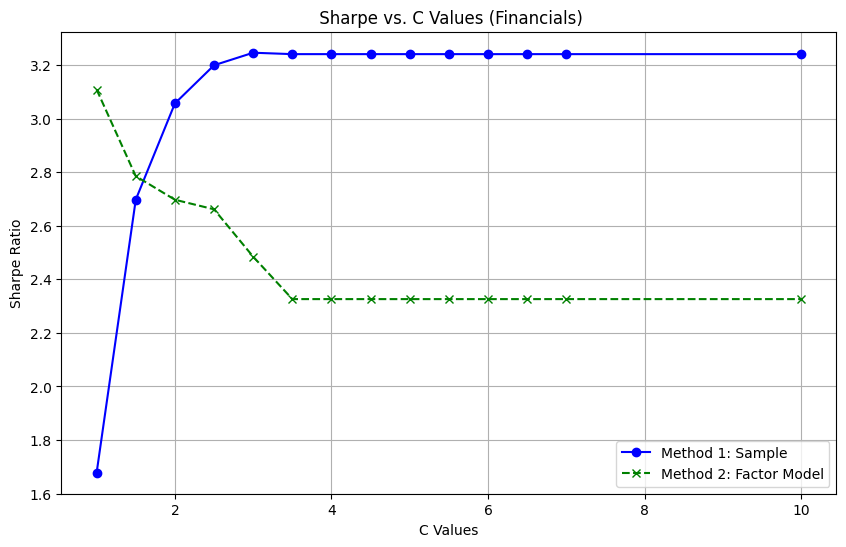

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Sharpe, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Sharpe_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title(' Sharpe vs. C Values (Financials)')
plt.xlabel('C Values')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


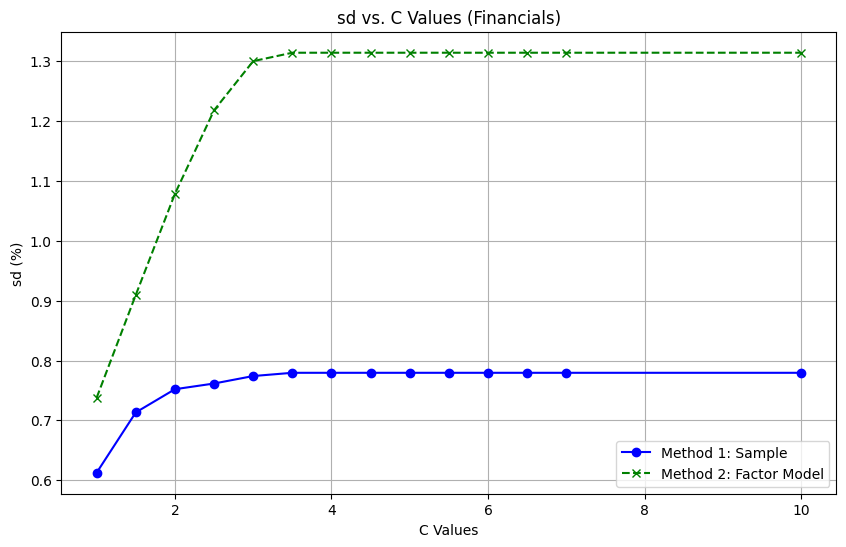

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, SD, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, SD_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('sd vs. C Values (Financials)')
plt.xlabel('C Values')
plt.ylabel('sd (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


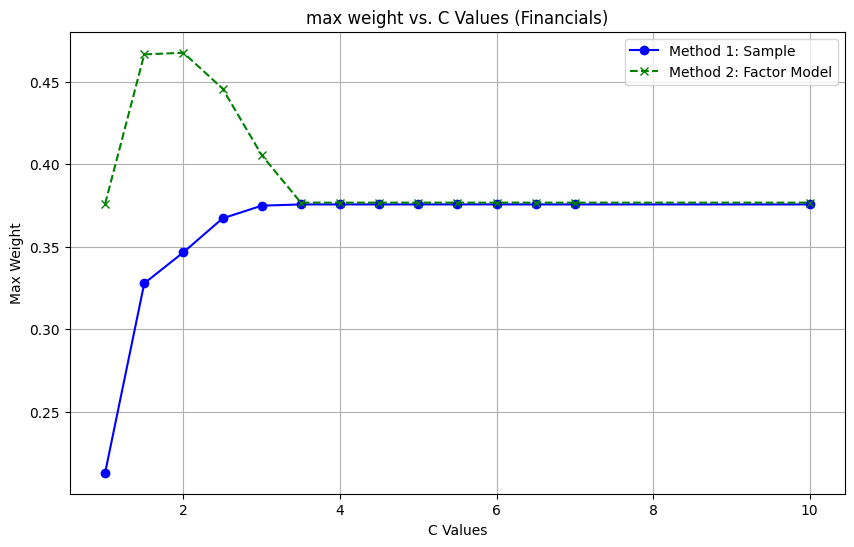

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np


# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Max, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Max_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('max weight vs. C Values (Financials)')
plt.xlabel('C Values')
plt.ylabel('Max Weight')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()
